In [24]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pylab as pl
from pandas.plotting import scatter_matrix
from matplotlib import cm

## Analysis and visualization of the data

In [2]:
fruits = pd.read_table("C:\\Users\\34609\\Documents\\Repos Git\\Data\\fruit_data_with_colors.txt")
fruits.head()

,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
0,1,apple,granny_smith,192,8.4,7.3,0.55
1,1,apple,granny_smith,180,8.0,6.8,0.59
2,1,apple,granny_smith,176,7.4,7.2,0.60
3,2,mandarin,mandarin,86,6.2,4.7,0.80
4,2,mandarin,mandarin,84,6.0,4.6,0.79


In [3]:
fruits["fruit_name"].unique()

array(['apple', 'mandarin', 'orange', 'lemon'], dtype=object)

In [4]:
fruits.shape #59 rows and 5 columns

(59, 7)

In [5]:
fruits.describe() #numerical features don't have the same scale NEED TO DO scaling!!

,fruit_label,mass,width,height,color_score
count,59.000000,59.000000,59.000000,59.000000,59.000000
mean,2.542373,163.118644,7.105085,7.693220,0.762881
std,1.208048,55.018832,0.816938,1.361017,0.076857
min,1.000000,76.000000,5.800000,4.000000,0.550000
25%,1.000000,140.000000,6.600000,7.200000,0.720000
50%,3.000000,158.000000,7.200000,7.600000,0.750000
75%,4.000000,177.000000,7.500000,8.200000,0.810000
max,4.000000,362.000000,9.600000,10.500000,0.930000


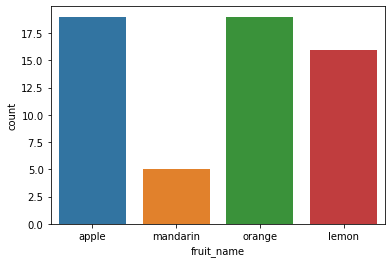

In [9]:
sns.countplot(fruits["fruit_name"], label = "Count"); #Data is almost homogeneus but for mandarin

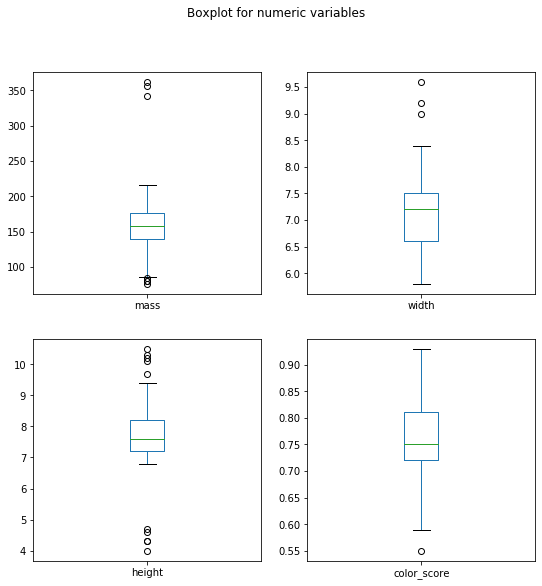

In [14]:
fruits_mod = fruits.drop("fruit_label", axis = 1)
fruits_mod.plot(kind = "box", subplots = True, layout = (2,2), sharex = False, sharey = False, figsize = (9,9), title = "Boxplot for numeric variables")
plt.savefig("fruits_boxplot") #saving plots as png files on the same folder
plt.show()

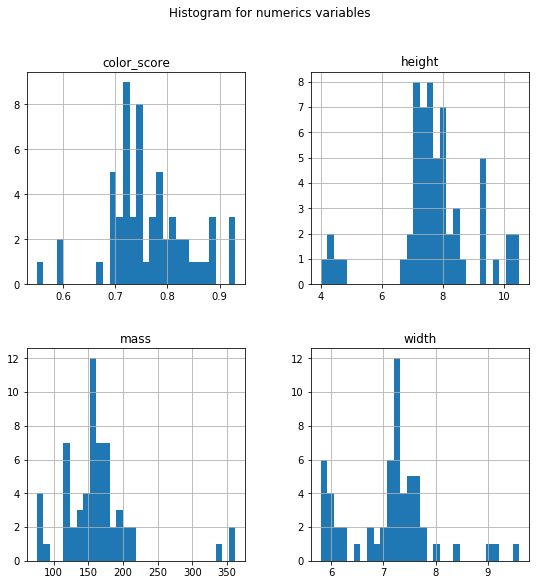

In [15]:
fruits_mod.hist(bins = 30, figsize = (9,9))
pl.suptitle("Histogram for numerics variables")
plt.savefig("fruits_hist")
plt.show() #Maybe Color has a Gaussian distribution

It looks like perhaps color score has a near Gaussian distribution.

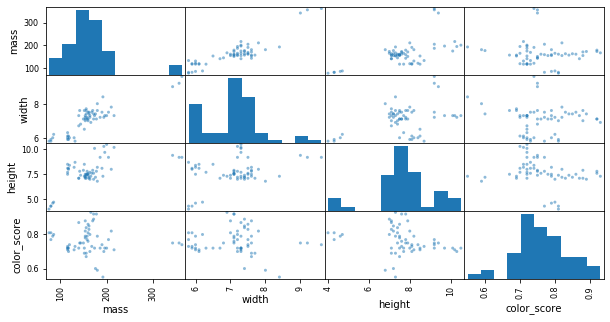

In [18]:
scatter_matrix(fruits_mod, figsize=(10, 5))
plt.show() #Mass and Width are correlated!!

## Preparing DATASET for Machine Learning model

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [19]:
#Separation of dataset into variables and targets
feature_names = ["mass", "width", "height", "color_score"]
X = fruits[feature_names]
y = fruits["fruit_label"]

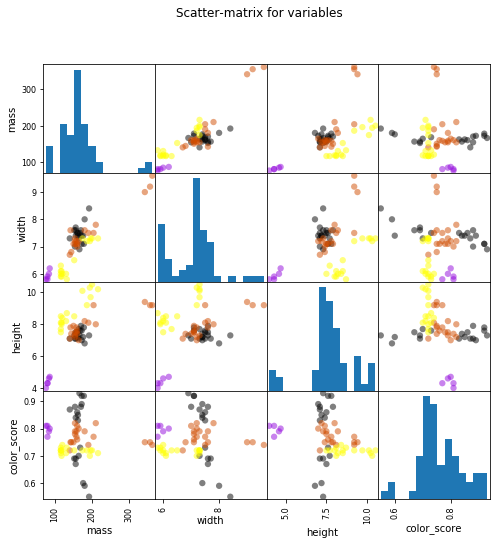

In [23]:
correlation = cm.get_cmap("gnuplot")
scatter = scatter_matrix(X, c = y, marker = "o", s = 40, hist_kwds = {"bins":15}, figsize = (8,8), cmap = correlation)
plt.suptitle("Scatter-matrix for variables")
plt.savefig("fruits_scatter_matrix")

In [28]:
#Dividing dataset into train and test, in the proportion 80:20
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,random_state = 42) 
#Why 42? answer at --The Hitchhiker's Guide to the Galaxy--

In [27]:
scaler = MinMaxScaler() #Scaling for the data, because the data are not within the same range
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## MODEL CONSTRUCTION
Construction of different classification models with the same dataset to be able to compare the Accuracies obtained and how the data from the test sub-dataset are classified.

### Logistic Regression

In [32]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

In [54]:
model_lg = LogisticRegression(random_state = 42, n_jobs = -1)
model_lg.fit(X_train, y_train)
acc_train_model_lg = model_log_reg.score(X_train, y_train)
acc_test_model_lg = model_log_reg.score(X_test, y_test)

print("Accuracy on training set: ", round(acc_train_model_lg, 2))
print("Accuracy on test set: ", round(acc_test_model_lg, 2))

Accuracy on training set:  0.83
Accuracy on test set:  0.75


### Decision Tree

In [53]:
model_tree = DecisionTreeClassifier(random_state = 42)
model_tree.fit(X_train, y_train)
acc_train_model_tree = model_tree.score(X_train, y_train)
acc_test_model_tree = model_tree.score(X_test, y_test)

print("Accuracy on training set: ", round(acc_train_model_tree, 2))
print("Accuracy on test set: ", round(acc_test_model_tree, 2))
#Accuracy of 1 probably means over-fitting on the train sub-dataset

Accuracy on training set:  1.0
Accuracy on test set:  0.83


In [52]:
model_tree_2 = DecisionTreeClassifier(random_state = 42, max_depth = 3)
model_tree_2.fit(X_train, y_train)
acc_train_model_tree_2 = model_tree_2.score(X_train, y_train)
acc_test_model_tree_2 = model_tree_2.score(X_test, y_test)

print("Accuracy on training set: ", round(acc_train_model_tree_2, 2))
print("Accuracy on test set: ", round(acc_test_model_tree_2, 2))
#Setting a max_depth in the decission tree classifier would help prevent over-fitting

Accuracy on training set:  0.98
Accuracy on test set:  0.83


### Support Vector Machine

In [51]:
model_svm = SVC(random_state = 42)
model_svm.fit(X_train, y_train)
acc_train_model_svm = model_svm.score(X_train, y_train)
acc_test_model_svm = model_svm.score(X_test, y_test)

print("Accuracy on training set: ", round(acc_train_model_svm, 2))
print("Accuracy on test set: ", round(acc_test_model_svm, 2))

Accuracy on training set:  0.45
Accuracy on test set:  0.5


### K-Nearest Neighbors

In [55]:
model_knn = KNeighborsClassifier(n_jobs = -1)
model_knn.fit(X_train, y_train)
acc_train_model_knn = model_knn.score(X_train, y_train)
acc_test_model_knn = model_knn.score(X_test, y_test)

print("Accuracy on training set: ", round(acc_train_model_knn, 2))
print("Accuracy on test set: ", round(acc_test_model_knn, 2))

Accuracy on training set:  0.81
Accuracy on test set:  0.5
